In [3]:
import numpy as np
import pandas as pd

In [4]:
df=pd.read_csv("titanic_train.csv")

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Missing completly at random (MCAR)

In [6]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Embarked column is example of MCAR

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Missing data not at random (MNAR)

In [8]:
df['Cabin_null']=np.where(df['Cabin'].isnull(),1,0)

#finding null values percentage
df['Cabin_null'].mean()

0.7710437710437711

In [9]:
df['Cabin'].isnull().mean()

0.7710437710437711

In [10]:
df['Survived'].mean()

0.3838383838383838

#### Mean/Median/Mode Imputation

In [11]:
df['Age'].median()

28.0

In [12]:
df['Age']=df['Age'].fillna(df['Age'].median())

In [13]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Cabin_null       0
dtype: int64

#### Random sample imputation

In [14]:
df1=pd.read_csv('titanic_train.csv',usecols=['Age','Fare','Survived'])

In [15]:
df1.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Cabin_null   891 non-null    int32  
dtypes: float64(2), int32(1), int64(5), object(5)
memory usage: 87.1+ KB


In [36]:
df1['random']=df1['Age']

In [35]:
random_sample=df1['Age'].dropna().sample(df1['Age'].isnull().sum(),random_state=0)

In [34]:
random_sample.index=df1[df1['Age'].isnull()].index

In [32]:
random_sample.index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [41]:
df1.loc[df1["random"].isnull(),'random']=random_sample

In [40]:
df1.head(10)

,Survived,Age,Fare,random
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0
5,0,NaN,8.4583,NaN
6,0,54.0,51.8625,54.0
7,0,2.0,21.0750,2.0
8,1,27.0,11.1333,27.0
9,1,14.0,30.0708,14.0


In [25]:
print(df1['Age'].std())
print(df1['random'].std())
print(df['Age'].std())#(Mean)

14.526497332334044
14.5636540895687
13.019696550973194


In [62]:
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot: ylabel='Density'>

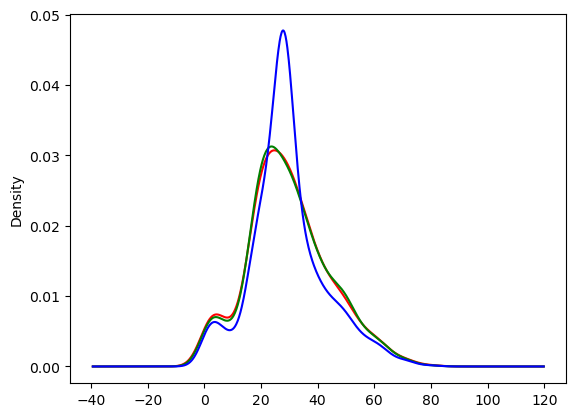

In [81]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
df1.Age.plot(kind='kde',ax=ax,color='red')
df1.random.plot(kind='kde',ax=ax,color='green')
df.Age.plot(kind='kde',ax=ax,color='blue')

1. We choose Random sample technique because the Standard deviation is same to original Age standard deviation 

#### Capturing Nan values with other features

In [82]:
df2=pd.read_csv('titanic_train.csv',usecols=['Age','Survived','Fare'])

In [90]:
df2['Age_nan']=np.where(df2['Age'].isnull(),1,0)

In [91]:
df2['Age_nan'].value_counts()

0    714
1    177
Name: Age_nan, dtype: int64

In [92]:
df2.head(10)

,Survived,Age,Fare,Age_nan
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,NaN,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


#### End of Distribution Imputation 

In [93]:
df3=pd.read_csv('titanic_train.csv',usecols=['Age','Survived','Fare'])

In [94]:
df3.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot: >

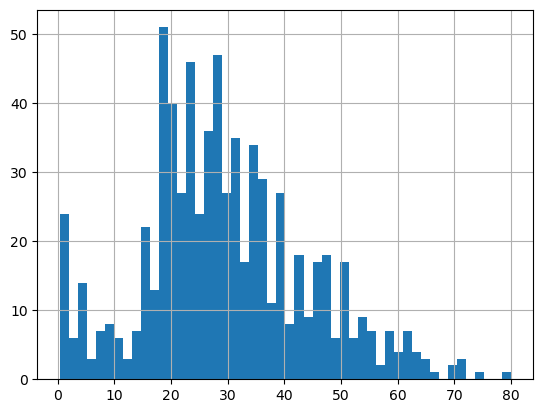

In [107]:
df3['Age'].hist(bins=50)

#### Arbitrary Value Impution

In [42]:
df4=pd.read_csv('titanic_train.csv',usecols=['Age','Fare','Survived'])

In [58]:
def impute_arbitrary(df,variable):
    df[variable+'_hundred']=df[variable].fillna(100)
    df[variable+'_zero']=df[variable].fillna(0)

In [59]:
impute_arbitrary(df4,'Age')

In [61]:
df4.head(10)

,Survived,Age,Fare,Age_hundred,Age_zero
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
5,0,NaN,8.4583,100.0,0.0
6,0,54.0,51.8625,54.0,54.0
7,0,2.0,21.0750,2.0,2.0
8,1,27.0,11.1333,27.0,27.0
9,1,14.0,30.0708,14.0,14.0


### Cateorical missing values

#### frequent categorical imputation

In [66]:
dataset.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [67]:
dataset=pd.read_csv('train.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [68]:
dataset.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [70]:
dataset.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

<AxesSubplot: >

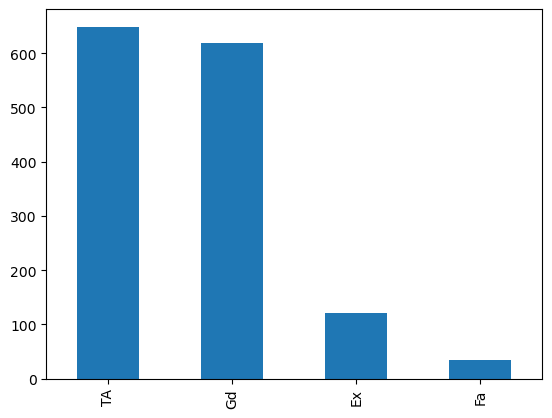

In [73]:
dataset['BsmtQual'].value_counts().plot.bar()

In [92]:
def impute_cat_nan(df,variable):
    df[variable].fillna(df[variable].value_counts().index[0],inplace=True)
    

In [94]:
impute_cat_nan(dataset,'BsmtQual')

In [96]:
impute_cat_nan(dataset,'FireplaceQu')

In [103]:
impute_cat_nan(dataset,'GarageType')

In [104]:
dataset.isnull().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

#### Adding a variable to capture nan

In [111]:
dataset1=pd.read_csv('train.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [112]:
dataset1['BsmtQual_var']=np.where(dataset1['BsmtQual'].isnull(),1,0)

In [113]:
dataset1.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [116]:
dataset1['BsmtQual'].fillna(dataset1['BsmtQual'].mode()[0],inplace=True)

In [117]:
dataset1['GarageType_var']=np.where(dataset1['GarageType'].isnull(),1,0)
dataset1['GarageType'].fillna(dataset1['GarageType'].mode()[0],inplace=True)


In [118]:
dataset1.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var,GarageType_var
0,Gd,NaN,Attchd,208500,0,0
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


#### if we have more frequent values then we replace nan with new category

In [4]:
dataset2=pd.read_csv('train.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [5]:
def impute_new(df,variable):
    df[variable+'_newvar']=np.where(df[variable].isnull(),'missing',df[variable])

In [6]:
for fea in dataset2.columns:
    impute_new(dataset2,fea)

In [7]:
dataset2.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_newvar,FireplaceQu_newvar,GarageType_newvar,SalePrice_newvar
0,Gd,NaN,Attchd,208500,Gd,missing,Attchd,208500
1,Gd,TA,Attchd,181500,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000,Gd,TA,Attchd,250000


In [126]:
dataset2.drop(['BsmtQual','FireplaceQu','GarageType','SalePrice_newvar'],axis=1,inplace=True)

In [127]:
dataset2.head()

,SalePrice,BsmtQual_newvar,FireplaceQu_newvar,GarageType_newvar
0,208500,Gd,missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd


In [17]:
#Random imputation
dataset2.FireplaceQu[dataset2.FireplaceQu.isnull()]=dataset2['FireplaceQu'].dropna().sample().values

C:\Users\hemanth\AppData\Local\Temp\ipykernel_34660\1664766375.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset2.FireplaceQu[dataset2.FireplaceQu.isnull()]=dataset2['FireplaceQu'].dropna().sample().values


In [19]:
dataset2['FireplaceQu'].isnull().sum()

0